In [110]:
# Import the required modules for basic data handling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
data = pd.read_csv('car_evaluation.csv', header = None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']
data.columns = col_names
data

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [112]:
# Bar plot function for visualisation

def barplotfunc(col, data, c):
    plt.figure()
    plt.title('Bar plot of ' + col)
    data[col].value_counts().plot(kind = 'bar', color = c)

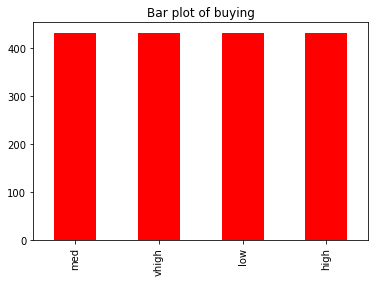

In [113]:
barplotfunc('buying', data, 'red')

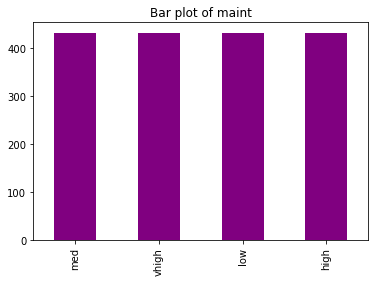

In [114]:
barplotfunc('maint', data, 'purple')

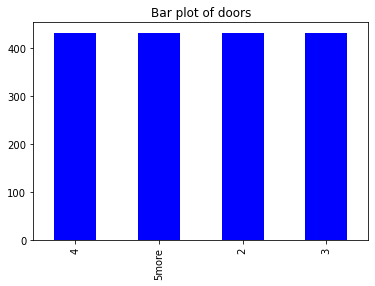

In [115]:
barplotfunc('doors', data, 'blue')

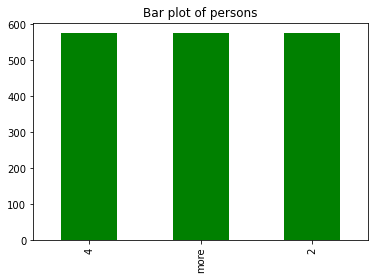

In [116]:
barplotfunc('persons', data, 'green')

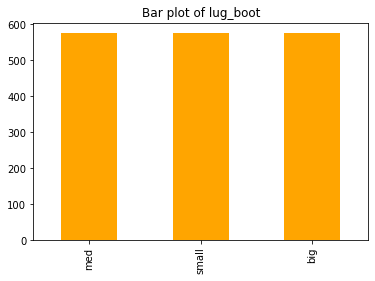

In [117]:
barplotfunc('lug_boot', data, 'orange')

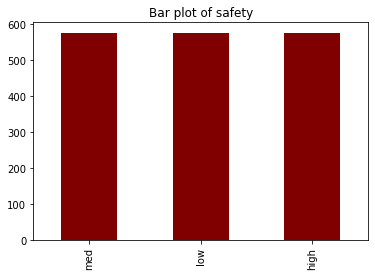

In [118]:
barplotfunc('safety', data, 'maroon')

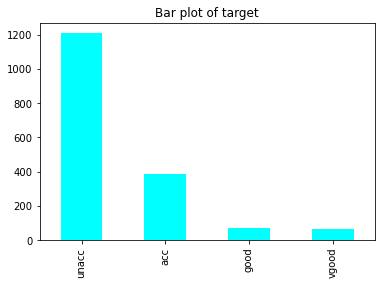

In [119]:
barplotfunc('target', data, 'cyan')

In [120]:
# encode variables with ordinal encoding

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
data = encoder.fit_transform(data)
data

,buying,maint,doors,persons,lug_boot,safety,target
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,good
1724,4,4,4,3,2,3,vgood
1725,4,4,4,3,3,1,unacc
1726,4,4,4,3,3,2,good


In [121]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 30)

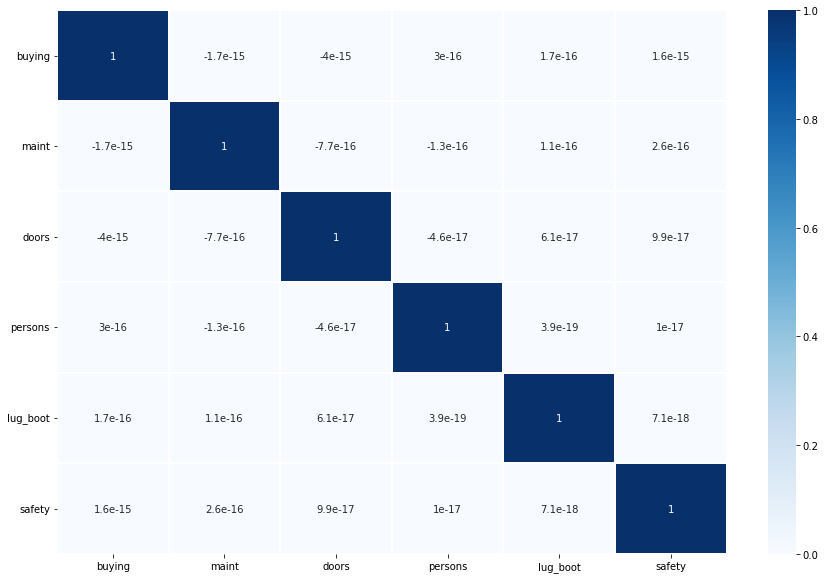

In [122]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

Text(0.5, 1.0, 'Training and test accuracy with gini index \n criterion vs depth of decision tree')

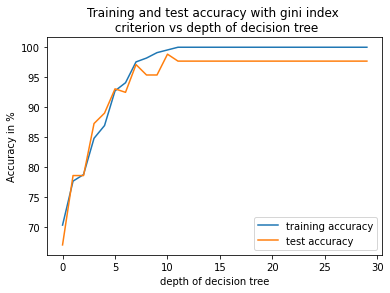

In [123]:
# import Decision Tree Classifier from sklearn

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# instantiate the Decision Tree Classifier model with criterion gini index for different depths
y_pred_train_gini = []
y_pred_gini = []
train_acc_gini, test_acc_gini = [], []

# Fit the model to data. Make predictions using the model and check accuracy

model = []
for i in range(1, 31):
    model.append(DecisionTreeClassifier(criterion='gini', max_features = 5, max_depth = i, random_state = 30))
    model[i-1].fit(X_train, y_train)
    y_pred_train_gini.append(model[i-1].predict(X_train))
    y_pred_gini.append(model[i-1].predict(X_test))
    train_acc_gini.append(accuracy_score(y_train, y_pred_train_gini[i-1]) * 100)
    test_acc_gini.append(accuracy_score(y_test, y_pred_gini[i-1]) * 100)

plt.plot(train_acc_gini)
plt.plot(test_acc_gini)
plt.legend(['training accuracy', 'test accuracy'])
plt.xlabel('depth of decision tree')
plt.ylabel('Accuracy in %')
plt.title('Training and test accuracy with gini index \n criterion vs depth of decision tree')

In [124]:
# import graphviz
# from sklearn.tree import export_graphviz
# from IPython.display import Image

modelgini = DecisionTreeClassifier(criterion = 'gini', max_features = 5, max_depth = 11, random_state = 30)
modelgini.fit(X_train, y_train)

y_pred_train_ginifinal = modelgini.predict(X_train)
print('Training-set accuracy score with gini index criterion: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_ginifinal)))

y_pred_ginifinal = modelgini.predict(X_test)
print('Test-set accuracy score with gini index criterion: {0:0.4f}'. format(accuracy_score(y_test, y_pred_ginifinal)))

# dt_graphviz = tree.export_graphviz(modelgini, out_file = None, feature_names = X.columns, class_names = y_train, filled=True, rounded=True, special_characters=True)
# pydot_graph = pydotplus.graph_from_dot_data(dt_graphviz)

# Image(pydot_graph.create_png())

Training-set accuracy score with gini index criterion: 0.9955
Test-set accuracy score with gini index criterion: 0.9884


Text(0.5, 1.0, 'Training and test accuracy with entropy \n criterion vs depth of decision tree')

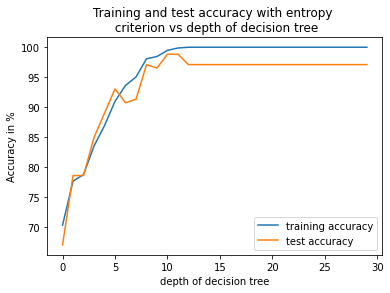

In [125]:
# instantiate the Decision Tree Classifier model with criterion  for different depths
y_pred_train_entropy = []
y_pred_entropy = []
train_acc_entropy, test_acc_entropy = [], []

# Fit the model to data. Make predictions using the model and check accuracy

model = []
for i in range(1, 31):
    model.append(DecisionTreeClassifier(criterion = 'entropy', max_features = 5, max_depth = i, random_state = 30))
    model[i-1].fit(X_train, y_train)
    y_pred_train_entropy.append(model[i-1].predict(X_train))
    y_pred_entropy.append(model[i-1].predict(X_test))
    train_acc_entropy.append(accuracy_score(y_train, y_pred_train_entropy[i-1]) * 100)
    test_acc_entropy.append(accuracy_score(y_test, y_pred_entropy[i-1]) * 100)

plt.plot(train_acc_entropy)
plt.plot(test_acc_entropy)
plt.legend(['training accuracy', 'test accuracy'])
plt.xlabel('depth of decision tree')
plt.ylabel('Accuracy in %')
plt.title('Training and test accuracy with entropy \n criterion vs depth of decision tree')

In [126]:
modelentropy = DecisionTreeClassifier(criterion = 'entropy', max_features = 5, max_depth = 10, random_state = 30)
modelentropy.fit(X_train, y_train)

y_pred_train_entropyfinal = modelentropy.predict(X_train)
print('Training-set accuracy score with entropy criterion: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_entropyfinal)))

y_pred_entropyfinal = modelgini.predict(X_test)
print('Test-set accuracy score with entropy criterion: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropyfinal)))

Training-set accuracy score with entropy criterion: 0.9846
Test-set accuracy score with entropy criterion: 0.9884


<AxesSubplot:>

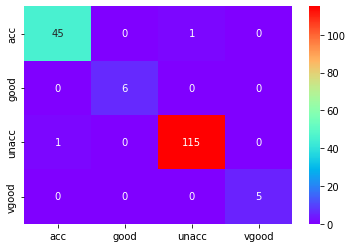

In [127]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_ginifinal)

cm_matrix = pd.DataFrame(data = cm1, columns = ['acc', 'good', 'unacc', 'vgood'], index = ['acc', 'good', 'unacc', 'vgood'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'rainbow')

<AxesSubplot:>

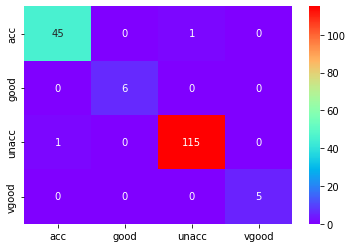

In [128]:
cm2 = confusion_matrix(y_test, y_pred_entropyfinal)

cm_matrix = pd.DataFrame(data = cm2, columns = ['acc', 'good', 'unacc', 'vgood'], index = ['acc', 'good', 'unacc', 'vgood'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'rainbow')

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ginifinal))

              precision    recall  f1-score   support

         acc       0.98      0.98      0.98        46
        good       1.00      1.00      1.00         6
       unacc       0.99      0.99      0.99       116
       vgood       1.00      1.00      1.00         5

    accuracy                           0.99       173
   macro avg       0.99      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173



In [130]:
print(classification_report(y_test, y_pred_entropyfinal))

              precision    recall  f1-score   support

         acc       0.98      0.98      0.98        46
        good       1.00      1.00      1.00         6
       unacc       0.99      0.99      0.99       116
       vgood       1.00      1.00      1.00         5

    accuracy                           0.99       173
   macro avg       0.99      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173

